<a href="https://colab.research.google.com/github/KontainPluton/TPs_Artificial_Neural_Network/blob/main/%5BTP_1%5D_%5BCorrection%5D_ANN_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple ANN with MNIST

Associate figures with handwritten pictures of numbers

## Data Loading

In [1]:
import torch
from torchvision import datasets, transforms

'''
  This code is used to download the dataset which is already splitted
  into a training  set and a testing set.
  Note that we apply simple transformation to the data to convert them
  into PyTorch Tensors and to normalize the pixel values entries in a 
  specific range of values. 
'''

transform_actions = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ]
)

mnist_trainset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform = transform_actions
)
    
mnist_testset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform = transform_actions
)


print("Training set size: ", len(mnist_trainset))
print("Testing set size : ", len(mnist_testset))

# we define a loader and an iterator to process the training set
trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training set size:  60000
Testing set size :  10000


Images shape:  torch.Size([64, 1, 28, 28])
Each batch contains 64 images, for which 1 channel of size 28 x 28 is defined 


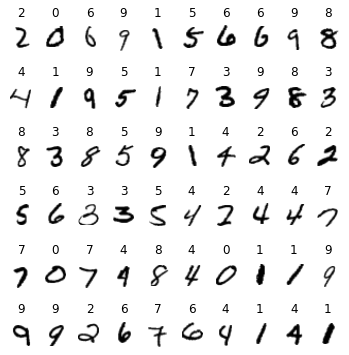

In [2]:
import matplotlib.pyplot as plt

images, labels = iter(trainloader).next()

print("Images shape: ", images.shape)
print("Each batch contains {} images, for which {} channel of size {} x {} is defined ".format(*images.shape))

# The following code is just used to plot
figure = plt.figure()
plt.subplots_adjust(top=5.2, bottom=4) 
num_of_images = 60
for index in range(0, num_of_images):
    plt.subplot(6, 10, index+1)
    plt.axis('off')
    plt.gca().set_title(labels[index].item())
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Simple ANN model

We will introduce a simple ANN considering: 
* That we will flatten the input data, i.e. represent the pixel values of a matrix as a vector of values. 
* Two hidden layers

Note that we are dealing with a multiclass classification task. 
Processing an input, the output of our network will therefore be a probability distribution that will give the probability for each classes (10 possible classes in this case).  

In [ ]:
# Notes proposées en cours			
      
      image X = 1 x 28 x 28
			model(X) \in R^10
			
			model(X) = Y'
			
								  Distribution de
								Probabilité prédite 
			
	  Logits    				                Q		         Indice
		5.2							                 0.2 		        (0)  ----> Prob selon le modèle que label(x) = 0
		4.2							                 0.1		        (1)
X  ->	...	\in R^10  -> Softmax ->    ...		       (...)		  ==>       Règle de décision 
		4.2							                 0.2		        (8)				         pour définir la classe
		4.2							                 0.05		        (9)				        de X lors de l'utilisation
																                                        du modèle (max) 
									                                sum(Q) = 1
									
	Training -> Loss function adaptée à ma problématique (classification multiclass monolabel) 
					                  ==> Cross-entropy(P,Q)
	
	     P (Distribution de probabilité correspondant à l'attendu)
input	Label		  P
					    0.0	    (0)  
					    0.0	    (1)
 X  	 8   ->	0.0	   (...)
					    1	      (8)	 --> probabilité de 1 pour label(X)
					    0.0	    (9)	

In [6]:
D_in = 1 * 28 * 28 # input dimension
D_out = 10     # output dimension

# Numbers of neurons for the two layers
H = 1000
H2 = 500

# Model definition using sequential
model = torch.nn.Sequential(
    torch.nn.Flatten(),        # first the input is flatten, output will be a vector of size dim(1) x ... x dim(-1), here 1 x 28 x 28 = 784
    torch.nn.Linear(D_in, H),  # Linear transformation 128 to H (num neurons Layer 1)
    torch.nn.ReLU(),           # activation function layer 1
    torch.nn.Linear(H, H2),    # Linear transformation H to H2 (num neurons Layer 2)
    torch.nn.ReLU(),           # activation function layer 2
    torch.nn.Linear(H2, D_out),# Linear transformation for the output H2 x D_out
    #torch.nn.Softmax(dim=1)   # Softmax of the D_out values generated so far (called logits) to obtain a probability distribution (sum of each outputs = 1)
)

In [13]:
batch_x, batch_y = next(iter(trainloader)) # Return entries and target
print(batch_x.shape)
batch_x = batch_x[:3,...] # Reduce batch (64 -> 3)
print(batch_x.shape)
y = model(batch_x) # Prediction of the system
print(y.shape) # 3 x 10 => 3 images x 10 outputs (10 classes)
torch.nn.Softmax(dim=1)(y) # Obtain a probability distribution

torch.Size([64, 1, 28, 28])
torch.Size([3, 1, 28, 28])
torch.Size([3, 10])


tensor([[1.3645e-05, 2.8959e-06, 2.0680e-07, 1.4128e-04, 3.5804e-02, 1.2598e-04,
         2.7410e-07, 6.4024e-04, 7.1659e-03, 9.5611e-01],
        [1.5845e-05, 6.5916e-08, 2.1336e-05, 5.0757e-06, 9.9867e-01, 5.2264e-05,
         1.8915e-05, 5.3032e-04, 4.7267e-05, 6.3887e-04],
        [1.9740e-06, 9.9731e-01, 4.2902e-04, 7.9475e-05, 1.9546e-04, 7.8006e-07,
         5.8333e-06, 1.8727e-03, 8.8204e-05, 1.9786e-05]],
       grad_fn=<SoftmaxBackward0>)

Note that we can consider that the logits will be trasformed into a probability distribution outside the network. As we will see we can directly give the logits to the loss function; it will perform the softmax for us.

It would have also been possible to perform the flatten transformation prior to defining the sequential model definition.


## Training procedure

In [8]:
def train_optim(model, epochs, log_frequency, device):

  model.to(device) # we make sure the model is on the proper device

  # Multiclass classification setting, we use cross-entropy
  # note that this implementation requires the logits as input 
  # logits: values prior softmax transformation 
  loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')

  learning_rate = 1e-4

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  
  for t in range(epochs):

      model.train() # we specify that we are training the model

      # At each epoch, the training set will be processed as a set of batches
      for batch_id,  batch in enumerate(trainloader) : 

        images, labels  = batch

        # we put the data on the same device
        images, labels = images.to(device), labels.to(device)  
        
        y_pred = model(images) # forward pass output=logits

        loss = loss_fn(y_pred, labels)

        if batch_id % log_frequency == 0:
            print("epoch: {:03d}, batch: {:03d}, loss: {:.3f} ".format(t+1, batch_id+1, loss.item()))

        optimizer.zero_grad() # clear the gradient before backward
        loss.backward()       # update the gradient

        optimizer.step() # update the model parameters using the gradient

      # Model evaluation after each step computing the accuracy
      model.eval()
      total = 0
      correct = 0
      for batch_id, batch in enumerate(testloader):
        images , labels = batch
        images , labels = images.to(device), labels.to(device)
        y_pred = model(images) # forward computes the logits
        sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
        _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      
      print("[validation] accuracy: {:.3f}%\n".format(100 * correct / total))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_optim(model, epochs=3, log_frequency=60, device=device)

epoch: 001, batch: 001, loss: 2.304 
epoch: 001, batch: 061, loss: 1.087 
epoch: 001, batch: 121, loss: 0.349 
epoch: 001, batch: 181, loss: 0.448 
epoch: 001, batch: 241, loss: 0.417 
epoch: 001, batch: 301, loss: 0.452 
epoch: 001, batch: 361, loss: 0.363 
epoch: 001, batch: 421, loss: 0.258 
epoch: 001, batch: 481, loss: 0.242 
epoch: 001, batch: 541, loss: 0.358 
epoch: 001, batch: 601, loss: 0.276 
epoch: 001, batch: 661, loss: 0.229 
epoch: 001, batch: 721, loss: 0.189 
epoch: 001, batch: 781, loss: 0.390 
epoch: 001, batch: 841, loss: 0.219 
epoch: 001, batch: 901, loss: 0.373 
[validation] accuracy: 93.520%

epoch: 002, batch: 001, loss: 0.137 
epoch: 002, batch: 061, loss: 0.101 
epoch: 002, batch: 121, loss: 0.118 
epoch: 002, batch: 181, loss: 0.213 
epoch: 002, batch: 241, loss: 0.219 
epoch: 002, batch: 301, loss: 0.219 
epoch: 002, batch: 361, loss: 0.065 
epoch: 002, batch: 421, loss: 0.251 
epoch: 002, batch: 481, loss: 0.107 
epoch: 002, batch: 541, loss: 0.252 
epoch:

Alternatively to defining the model with ```Sequential```, we can create our network as a subclass of ```torch.nn.Module```

In [9]:
import torch.nn.functional as F

class MyModel(torch.nn.Module):
  def __init__(self, D_in, H, H2, D_out):
    super(MyModel, self).__init__()
    self.flatten = torch.nn.Flatten()
    self.lin1 = torch.nn.Linear(D_in, H)
    self.lin2 = torch.nn.Linear(H, H2)
    self.lin3 = torch.nn.Linear(H2, D_out)

  def forward(self, x):
    """
      x : [batch_size, 1, height, width ]
    """
    x = self.flatten(x) # [batch_size, 1 * width * height]
    x = F.relu( self.lin1(x) ) 
    x = F.relu( self.lin2(x) )
    x = self.lin3(x)

    return x

In [10]:
D_in = 28 * 28 # input dimension
D_out = 10     # output dimension

# Numbers of neurons for the two layers
H = 1000
H2 = 500

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = MyModel(D_in, H, H2, D_out)
train_optim(model, epochs=3, log_frequency=60, device=device)

epoch: 001, batch: 001, loss: 2.326 
epoch: 001, batch: 061, loss: 0.928 
epoch: 001, batch: 121, loss: 0.346 
epoch: 001, batch: 181, loss: 0.398 
epoch: 001, batch: 241, loss: 0.447 
epoch: 001, batch: 301, loss: 0.540 
epoch: 001, batch: 361, loss: 0.420 
epoch: 001, batch: 421, loss: 0.414 
epoch: 001, batch: 481, loss: 0.319 
epoch: 001, batch: 541, loss: 0.501 
epoch: 001, batch: 601, loss: 0.152 
epoch: 001, batch: 661, loss: 0.322 
epoch: 001, batch: 721, loss: 0.296 
epoch: 001, batch: 781, loss: 0.259 
epoch: 001, batch: 841, loss: 0.198 
epoch: 001, batch: 901, loss: 0.259 
[validation] accuracy: 93.060%

epoch: 002, batch: 001, loss: 0.235 
epoch: 002, batch: 061, loss: 0.219 
epoch: 002, batch: 121, loss: 0.213 
epoch: 002, batch: 181, loss: 0.265 
epoch: 002, batch: 241, loss: 0.288 
epoch: 002, batch: 301, loss: 0.216 
epoch: 002, batch: 361, loss: 0.166 
epoch: 002, batch: 421, loss: 0.086 
epoch: 002, batch: 481, loss: 0.056 
epoch: 002, batch: 541, loss: 0.133 
epoch: